# **Importing Libraries**

In [ ]:
import os
import random
import cv2 as cv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
import nbformat
from PIL import Image
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/CVPR/Mid/animals'

In [ ]:
catagories = []
for c in os.listdir(data_path):
    catagories.append(c)
print(catagories)

['panda', 'dogs', 'cats']


In [ ]:
data = []
for c in catagories:
  # Getting absolute path of each img by joining class name at the end of the data path
  path = os.path.join(data_path, c)

  # Getting class num by index of each catagory
  class_num = catagories.index(c)

  for img in tqdm(os.listdir(path)):
    # Reading image in gray scale
    img_arr = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)

    # Resizing image to 40x40 using bilinear interpolation
    img_arr = cv.resize(img_arr, (32, 32), interpolation=cv.INTER_AREA)

    # Appending image array and class num to data
    data.append([img_arr, class_num])

print(len(data))

100%|██████████| 1000/1000 [00:24<00:00, 41.53it/s]

3020


In [ ]:
random.shuffle(data)

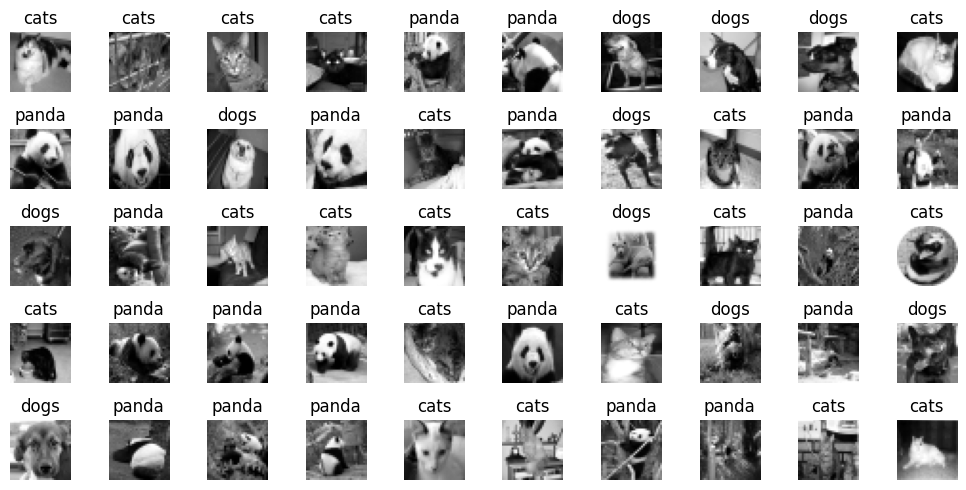

In [ ]:
# Display images with their labels (showing the first 50 images)
plt.figure(figsize=(10, 5))

for i in range(50):
  plt.subplot(5, 10, i+1)
  plt.imshow(data[i][0], cmap='gray')
  plt.title(catagories[data[i][1]])
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
f1 = data[0:600]
f2 = data[600:1200]
f3 = data[1200:1800]
f4 = data[1800:2400]
f5 = data[2400:3000]

In [ ]:
#L1 and L2 distance
def calc_l1_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def calc_l2_distance(x1, x2):
    return np.sqrt(np.sum(np.abs(x1 - x2)**2))

In [ ]:
k_max = 20
def calc_distance(train, val):
  # To store the distances
  l1_result = []
  l2_result = []

  for v in tqdm(val):
    temp = []
    for t in train:
      temp.append([v[1],  t[1], {"l1": calc_l1_distance(v[0], t[0]), "l2": calc_l2_distance(v[0], t[0])}])

    temp.sort(key=lambda x: x[2]["l1"])
    l1_result.append(temp[:k_max])

    temp.sort(key=lambda x: x[2]["l2"])
    l2_result.append(temp[:k_max])

  return [l1_result, l2_result]

In [ ]:
k_max = 20
def calc_accuracy(distance_val, distance_label):
    k_acc = []
    for k in range(1, k_max+1):
        img_acc = 0

        for img_dist in distance_val:
            top_k = img_dist[:k]

            same_class_img = [t_k for t_k in top_k if t_k[0] == t_k[1]]

            if k % 2 != 0:
                if (k // 2) < len(same_class_img):
                    img_acc += 1
            else:
                diff_class_img = [t_k for t_k in top_k if t_k[0] != t_k[1]]
                if len(same_class_img) > len(diff_class_img):
                    img_acc += 1
                elif len(same_class_img) == len(diff_class_img):
                    same_class_dist = sum([s_c[2][distance_label] for s_c in same_class_img])
                    diff_class_dist = sum([d_c[2][distance_label] for d_c in diff_class_img])
                    if same_class_dist > diff_class_dist:
                        img_acc += 1

        k_acc.append(img_acc/len(distance_val))
    return k_acc

In [ ]:
fold_distance = []

for i in range(1,6):
    if i == 0:
        train = f1 + f2 + f3 + f4
        validation = f5
    elif i == 1:
        train = f1 + f2 + f3 + f5
        validation = f4
    elif i == 2:
        train = f1 + f2 + f4 + f5
        validation = f3
    elif i == 3:
        train = f1 + f3 + f4 + f5
        validation = f2
    elif i == 5:
        train = f2 + f3 + f4 + f5
        validation = f1

    fold_distance.append(calc_distance(train, validation))

len(fold_distance[0][0])

100%|██████████| 600/600 [00:34<00:00, 17.46it/s]


600

# **PLOTTING**

In [ ]:
accuracies = []

for result in fold_distance:
    l1_accuracy = calc_accuracy(result[0], "l1")
    l2_accuracy = calc_accuracy(result[1], "l2")
    accuracies.append([l1_accuracy, l2_accuracy])

accuracies

[[[0.4,
   0.4216666666666667,
   0.38166666666666665,
   0.36,
   0.345,
   0.33166666666666667,
   0.315,
   0.3016666666666667,
   0.2816666666666667,
   0.2816666666666667,
   0.27666666666666667,
   0.26666666666666666,
   0.255,
   0.25166666666666665,
   0.24,
   0.24833333333333332,
   0.24166666666666667,
   0.235,
   0.22,
   0.21333333333333335],
  [0.40166666666666667,
   0.41,
   0.365,
   0.37333333333333335,
   0.36,
   0.3383333333333333,
   0.32,
   0.2966666666666667,
   0.28833333333333333,
   0.285,
   0.285,
   0.285,
   0.27166666666666667,
   0.265,
   0.24833333333333332,
   0.25833333333333336,
   0.22666666666666666,
   0.21833333333333332,
   0.235,
   0.22666666666666666]],
 [[0.4033333333333333,
   0.385,
   0.35833333333333334,
   0.31333333333333335,
   0.32666666666666666,
   0.2916666666666667,
   0.29833333333333334,
   0.27666666666666667,
   0.2816666666666667,
   0.29,
   0.285,
   0.27166666666666667,
   0.2816666666666667,
   0.25,
   0.2733333333

# **L1 Accuracy**

Max Accuracy for L1 in fold=1 is : 0.4217
Max Accuracy for L1 in fold=2 is : 0.4033
Max Accuracy for L1 in fold=3 is : 0.4483
Max Accuracy for L1 in fold=4 is : 0.4483
Max Accuracy for L1 in fold=5 is : 0.4167


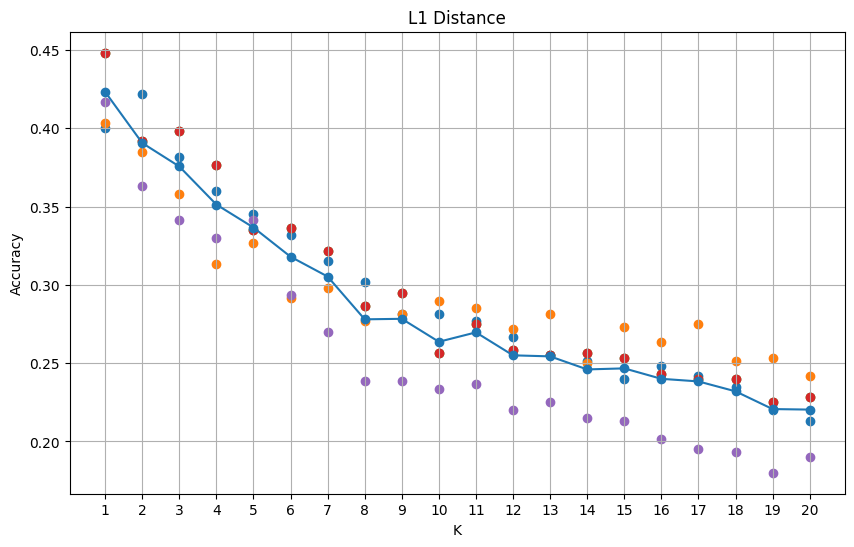

In [ ]:
i = 1
for fold in accuracies:
  y = fold[0]
  max_val = [round(y, 4) for y in y]
  print(f"Max Accuracy for L1 in fold={i} is : {max(max_val)}")
  i += 1

x_list = list(range(1, k_max+1))
plt.figure(figsize=(10, 6))

for fold in accuracies:
  y_list = fold[0]
  numbers = y_list
  plt.scatter(x_list, y_list)


arr = []
for i in range(k_max):
  arr.append([fold[0][i] for fold in accuracies])
trend = [np.mean(a) for a in arr]

plt.errorbar(x_list, trend, fmt='-o')
plt.title('L1 Distance')
# Sets the X-axis ticks to the values in x_list (K values).
plt.xticks(x_list)
# Enables a grid on the plot for better readability.
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()




# **L2** **Accuracy**

Max Accuracy for L2 in fold=1 is : 0.41
Max Accuracy for L2 in fold=2 is : 0.47
Max Accuracy for L2 in fold=3 is : 0.4233
Max Accuracy for L2 in fold=4 is : 0.4233
Max Accuracy for L2 in fold=5 is : 0.42


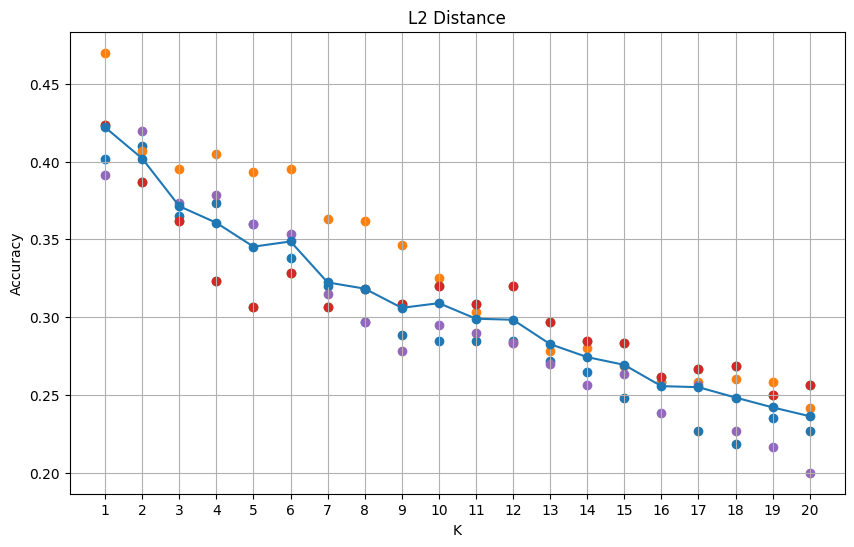

In [ ]:
i = 1
for fold in accuracies:
  y = fold[1]
  max_val = [round(y, 4) for y in y]
  print(f"Max Accuracy for L2 in fold={i} is : {max(max_val)}")
  i += 1

x_list = list(range(1, k_max+1))
plt.figure(figsize=(10, 6))

for fold in accuracies:
  y_list = fold[1]
  numbers = y_list
  plt.scatter(x_list, y_list)


arr = []
for i in range(k_max):
  arr.append([fold[1][i] for fold in accuracies])
trend = [np.mean(a) for a in arr]

plt.errorbar(x_list, trend, fmt='-o')
plt.title('L2 Distance')
# Sets the X-axis ticks to the values in x_list (K values).
plt.xticks(x_list)
# Enables a grid on the plot for better readability.
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()




# **Discussion**

From the graphs it can be seen that, both distance(L1 and L2) metrics exihit a general trend of decreasing accuracy as the the k increases. Initially, the L1 distance shows a slightly higher for smaller values of k compared to L2 distance. However, as k increases, the differecnce become negligible, and both metrics converge towards lower accuracy.
The L2 distance demonstrates higher accuracy peaks at centein points,such as k = 2(47%). And for L1, the highest accuracy is 44% when k = 3 and k = 4.
Since the data set contains gray-scale images, the features are likely pixel-intensities. The nature of these features can influence the effectiveness of the distance metric used. Specifically, the L1 distance's robustness to outliers might be beneficial in scenarios where noise or artifacts are present in the images. Conversely, the L2 distance, being more sensitive to the magnitude of differences due to its squaring operation, might better capture the natural variations in pixel intensities that differentiate classes.

Overall, both Manhattan (L1) and Euclidean (L2) distances display similar patterns of performance degradation with increasing k values. Nevertheless, L2 occasionally outperforms L1 at certain lower values of k, highlighting its potential advantage in specific contexts within the dataset.

# **Limitations and Potential Improvements**

1. The absence of feature scalling might affect the performance of the distance metrices, specially for the L2 distance, which is sensitve to the scale of features. Applyying standardization or normalization could potentially improve accuracy.

2. Other distance metrics acan offer a more comprehensive result.

3. To improve model accuracy, for a small and unbalances dataset(3000), data augmentation techniques can be used to expand dataset and enhance the model's learning capability.

# **Top 5 Predictions**

**For L1**

In [ ]:
test_data = []

for i in range(100):
  test_data.append(data[i][0])

for img in test_data:
  distance1 = []

  for train_img, class_num in data:
    distance1.append([class_num, calc_l1_distance(img, train_img)])

  distance1.sort(key=lambda x: x[1])

  for i, [class_num, d] in enumerate(distance1[:5]):
    print(f"{i+1}=> Class : {catagories[class_num]} L1 distance : {d}")
  break

1=> Class : cats L1 distance : 0
2=> Class : dogs L1 distance : 81710
3=> Class : cats L1 distance : 83410
4=> Class : dogs L1 distance : 83632
5=> Class : panda L1 distance : 84165


**For L2**

In [ ]:
test_data = []

for i in range(100):
  test_data.append(data[i][0])

for img in test_data:
  distance2 = []

  for train_img, class_num in data:
    distance2.append([class_num, calc_l2_distance(img, train_img)])

  distance2.sort(key=lambda x: x[1])

  for i, [class_num, d] in enumerate(distance2[:5]):
    print(f"{i+1}=> Class : {catagories[class_num]} L2 distance : {d}")
  break

1=> Class : cats L2 distance : 0.0
2=> Class : cats L2 distance : 304.8950639154396
3=> Class : dogs L2 distance : 307.75477250564285
4=> Class : cats L2 distance : 309.7418279793674
5=> Class : cats L2 distance : 310.1032086257735
